# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 8: *AngularFourierDescriptors*
Compute the angular Fourier descriptors of a shape in an image 
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import createImageF, createVectorF
from ImageRegionsUtilities import findLongestCentredSegmentinImage, plotShapeinImage, computeAngularFunctions
from PlotUtilities import plotHistogram, plotCurveXY 

# Math and iteration
from math import pi, sqrt, sin, cos
from timeit import itertools

### Parameters:
    pathToDir = Input image directory
    imageName = Input image name
    gaussianKernelSize = Gaussian kernel size. Filter noise
    sobelKernelSize = Sobel kernel size. Edge detection
    upperT = Upper threshold
    lowerT = Lower threshold
    numDescriptors = Number of descriptors

In [2]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter8/Input/")
imageName = "f14.png"
gaussianKernelSize = 5
sobelKernelSize = 3
upperT = 0.3
lowerT = 0.05
numDescriptors = 20

### Obtain a shape from the input image and draw it

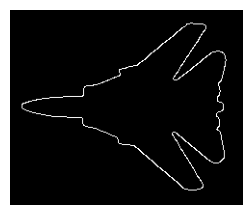

In [3]:
centre, shape, width, height = findLongestCentredSegmentinImage(pathToDir + imageName,   \
                                                gaussianKernelSize, sobelKernelSize, upperT, lowerT)
plotShapeinImage(shape, centre, width, height, figureSize = 3)

### Obtain the angular functions and plot 

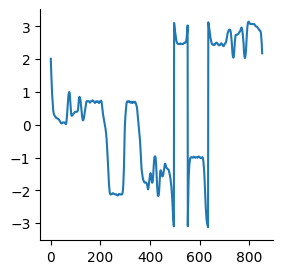

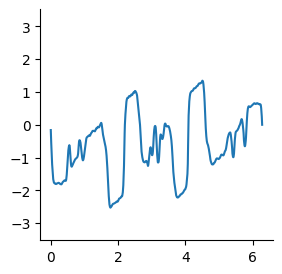

In [4]:
sumArcLenghts, normArcLenghts, angularFunc, cumulativeFunc, cumulativeNormFunc =         \
                                                          computeAngularFunctions(shape)

plotCurveXY(sumArcLenghts,angularFunc, [-3.2, 3.2])
plotCurveXY(normArcLenghts,cumulativeNormFunc, [-3.2, 3.2])

### Compute coefficients 

In [5]:
# Number of coefficients
numEdges = len(sumArcLenghts)
shapeLenght = sumArcLenghts[numEdges - 1]

# If number descriptors is 0 use the maximum according to the lenght
if numDescriptors == 0:
    numDescriptors = 1 + int(numEdges /2)

# Compute coefficients 
coefficients = createImageF(numDescriptors, 2)
lenghtNorm = 2.0 * pi / shapeLenght
for k in range(1, numDescriptors):
    arcLenght = 0
    for p in range(0, numEdges):
        coefficients[0, k] += cumulativeFunc[p] * (sumArcLenghts[p] - arcLenght)          \
                                                * cos(k * sumArcLenghts[p] * lenghtNorm)
        coefficients[1, k] += cumulativeFunc[p] * (sumArcLenghts[p] - arcLenght)          \
                                                * sin(k * sumArcLenghts[p] * lenghtNorm)
        arcLenght = sumArcLenghts[p]
  
    coefficients[0, k] = coefficients[0, k] *(2.0/shapeLenght)
    coefficients[1, k] = coefficients[1, k] *(2.0/shapeLenght) - (2.0/k)

### Rotation invariant descriptors

In [6]:
descriptors = createVectorF(numDescriptors)
for k in range(0, numDescriptors):
    descriptors[k] = sqrt(coefficients[0, k]*coefficients[0, k] +                         \
                          coefficients[1, k]*coefficients[1, k])

### Plot descriptors

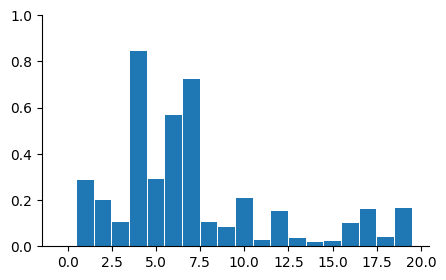

In [7]:
plotHistogram(descriptors, [0, 1], .95)